In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import methylprep
import methylcheck
from pprint import pprint as pp
mprep_minfi_path = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_0722') # methylprep --all --minfi v1.5.3
mprep_ses_path = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_ses0722') # methylprep --all v1.5.3
m_v111 = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_v111') # methylprep --betas v1.1.1 2019 version
m_v146 = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_v146') # methylprep --betas v1.4.6 March-2021 version --minfi
minpath = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_minfi')
sespath = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_sesame')

In [18]:
m_v111_samples = {}
for _csv in Path(m_v111, '3999356047').rglob('*'):
    sample_name = '_'.join(Path(_csv).stem.split('_')[:2])
    sample = pd.read_csv(_csv).set_index('IlmnID')
    m_v111_samples[sample_name] = sample

m_v146_samples = {}
for _csv in Path(m_v146, '3999356047').rglob('*'):
    sample_name = '_'.join(Path(_csv).stem.split('_')[:2])
    sample = pd.read_csv(_csv).set_index('IlmnID')
    m_v146_samples[sample_name] = sample
  
mprep_minfi_beta = pd.read_pickle(Path(mprep_minfi_path,'beta_values.pkl')).sort_index()['3999356047_R01C01']
mprep_ses_beta = pd.read_pickle(Path(mprep_ses_path,'beta_values.pkl')).sort_index()['3999356047_R01C01']

ses_beta = pd.read_csv(Path(sespath, 'sesame_betas.csv')).set_index('Unnamed: 0').sort_index()['GSM2815705_3999356047_R01C01']
ses_beta.index.name = 'IlmnID'
ses_beta = ses_beta[ ~ses_beta.index.str.startswith('rs') ]
minfi_beta = pd.read_csv(Path(minpath, 'minfi_noob_beta.csv')).set_index('Unnamed: 0').sort_index()['GSM2815705_3999356047_R01C01']
minfi_beta.index.name = 'IlmnID'

In [19]:
mprep_minfi_beta.shape, minfi_beta.shape, mprep_ses_beta.shape, ses_beta.shape

((485512,), (485512,), (485512,), (485512,))

# beta values: methylprep vs sesame

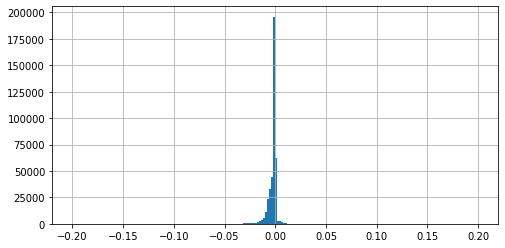

In [25]:
(mprep_ses_beta - ses_beta).hist(bins=200, range=[-0.2,0.2], figsize=(8,4))
plt.show()

# beta values: methylprep vs minfi

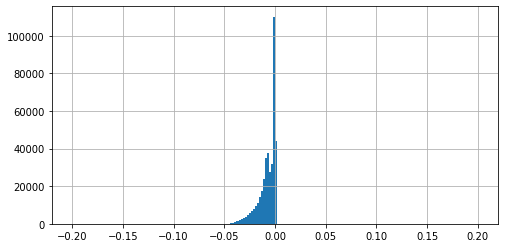

In [26]:
(mprep_minfi_beta - minfi_beta).hist(bins=200, range=[-0.2,0.2], figsize=(8,4))
plt.show()

# beta values: sesame vs minfi

<AxesSubplot:>

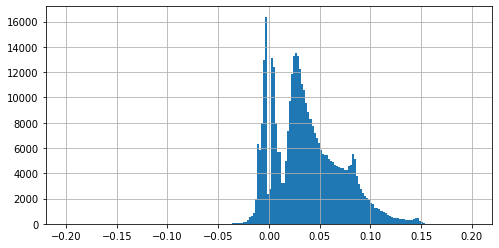

In [22]:
(ses_beta - minfi_beta.sort_index()).hist(bins=200, range=[-0.2,0.2], figsize=(8,4))